# Data Exploratory Analysis

In [9]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd


# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import statements required for Plotly 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls


# for warnings 
import warnings
warnings.filterwarnings('ignore')

In [10]:
file = r'INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls'
original_data= pd.read_excel(file)
original_data.head(3)

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4


# <brc>

## 1.Distribution of the dataset
In general, one of the first few steps in exploring the data would be to have a rough idea of how the features are distributed with one another. To do so, we shall invoke the familiar kdeplot function from the Seaborn plotting library. The distribution has been done by both numerical and categorical features. it will show the overall idea about the density and majority of data present in a different level.



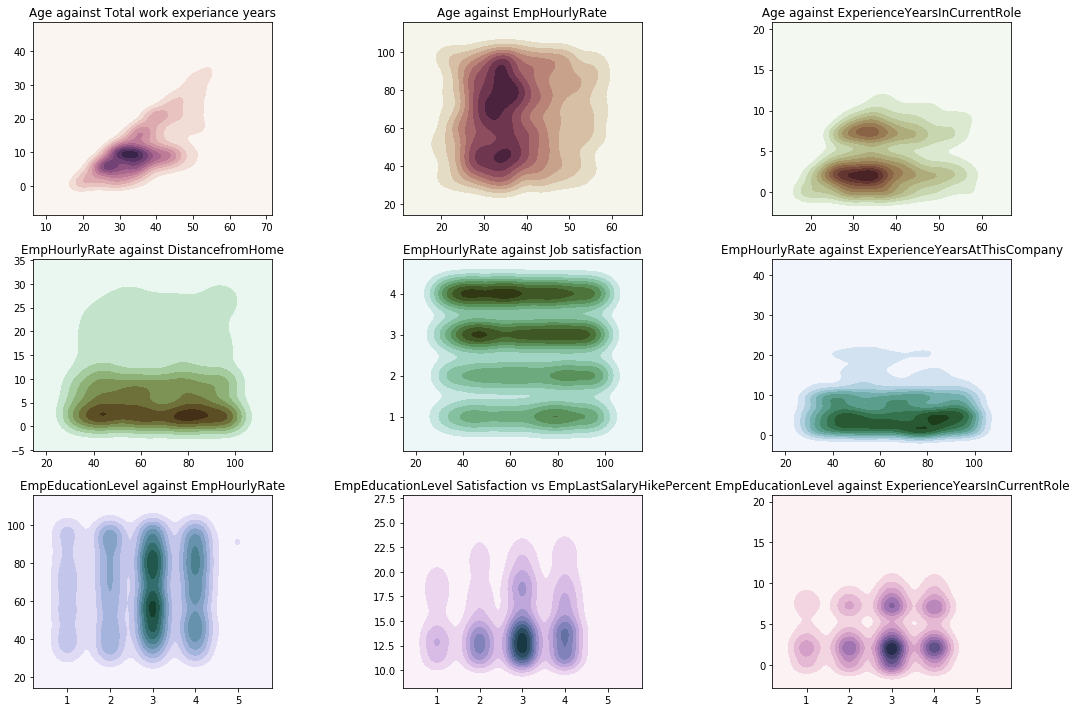

In [11]:
# Plotting the KDEplots
f, axes = plt.subplots(3, 3, figsize=(15, 10), 
                       sharex=False, sharey=False)

# Defining our colormap scheme
s = np.linspace(0, 3, 10)
cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)

# Generate and plot
x = original_data['Age'].values
y = original_data['TotalWorkExperienceInYears'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=axes[0,0])
axes[0,0].set( title = 'Age against Total work experiance years')

cmap = sns.cubehelix_palette(start=0.333333333333, light=1, as_cmap=True)
# Generate and plot
x = original_data['Age'].values
y = original_data['EmpHourlyRate'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,1])
axes[0,1].set( title = 'Age against EmpHourlyRate')

cmap = sns.cubehelix_palette(start=0.666666666667, light=1, as_cmap=True)
# Generate and plot
x = original_data['Age'].values
y = original_data['ExperienceYearsInCurrentRole'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,2])
axes[0,2].set( title = ' Age against ExperienceYearsInCurrentRole ')

cmap = sns.cubehelix_palette(start=1.0, light=1, as_cmap=True)
# Generate and plot
x = original_data['EmpHourlyRate'].values
y = original_data['DistanceFromHome'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,0])
axes[1,0].set( title = 'EmpHourlyRate against DistancefromHome')

cmap = sns.cubehelix_palette(start=1.333333333333, light=1, as_cmap=True)
# Generate and plot
x = original_data['EmpHourlyRate'].values
y = original_data['EmpJobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,1])
axes[1,1].set( title = 'EmpHourlyRate against Job satisfaction')

cmap = sns.cubehelix_palette(start=1.666666666667, light=1, as_cmap=True)
# Generate and plot
x = original_data['EmpHourlyRate'].values
y = original_data['ExperienceYearsAtThisCompany'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,2])
axes[1,2].set( title = 'EmpHourlyRate against ExperienceYearsAtThisCompany')

cmap = sns.cubehelix_palette(start=2.0, light=1, as_cmap=True)
# Generate and plot
x = original_data['EmpEducationLevel'].values
y = original_data['EmpHourlyRate'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,0])
axes[2,0].set( title = 'EmpEducationLevel against EmpHourlyRate')

cmap = sns.cubehelix_palette(start=2.333333333333, light=1, as_cmap=True)
# Generate and plot
x = original_data['EmpEducationLevel'].values
y = original_data['EmpLastSalaryHikePercent'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,1])
axes[2,1].set( title = 'EmpEducationLevel Satisfaction vs EmpLastSalaryHikePercent')

cmap = sns.cubehelix_palette(start=2.666666666667, light=1, as_cmap=True)
# Generate and plot
x = original_data['EmpEducationLevel'].values
y = original_data['ExperienceYearsInCurrentRole'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,2])
axes[2,2].set( title = 'EmpEducationLevel against ExperienceYearsInCurrentRole')

f.tight_layout()

### Distribution of Numerical Features
This helps us determine, among other early insights, how representative is the training dataset of the actual problem domain.the distribution can be derived or visualized using the density map between the numerical or categorical features present in the data. 

- The age distribution is starting from 18 to 60 where the most of the employees are lying between **30 to 40** age count.
- The distance from home to office is distributing from 0 unit to 30 unit which can be kilometre or mile. The most of the employees are coming from the range of 0 to 5 units.
- Employees are worked in the multiple companies up to **8** companies where most of the employees worked up to **2** companies before getting to work here.
- The hourly rate range is **65 to 95** for majority employees work in this company.
- In General, Most of Employees work up to **5** years in this company.
- Most of the employees get 11%  to 15% of salary hike in this company.

### Distribution of Categorical Features

- The Gender variance is divided by **60%** of Male employees and **40%** of Female employees in the company. 
- The number of the educational backgrounds present in the employees is **six** unique backgrounds.
- nineteen unique employee job roles are present in this company.
- The most of the employees are having the education level of **3**
- The Job satisfaction level in this company is high level for the majority of employees.
- The **85%** of employees are not having attrition in their work
- only **11%** of employees in the company were achieved **level 4** - performance rating 
- The overall percentage of employees doing overtime is **30%**

# <brc>

## 2. Correlation of Features
The next tool in a data explorer's arsenal is that of a correlation matrix. By plotting a correlation matrix, we have a very nice overview of how the features are related to one another. For a Pandas data frame, we can conveniently use the call .corr which by default provides the Pearson Correlation values of the columns pairwise in that data frame. The correlation works bet for numerical data where we are going to use all the numerical features present in the data. 

In [12]:
# creating a list of only numerical values
numerical = [u'Age', u'DistanceFromHome', u'EmpEducationLevel', u'EmpEnvironmentSatisfaction', u'EmpHourlyRate'
 , u'EmpJobInvolvement', u'EmpJobLevel', u'EmpJobSatisfaction'
 , u'NumCompaniesWorked', u'EmpLastSalaryHikePercent'
 , u'EmpRelationshipSatisfaction', u'TotalWorkExperienceInYears'
 , u'TrainingTimesLastYear', u'EmpWorkLifeBalance'
 , u'ExperienceYearsAtThisCompany', u'ExperienceYearsInCurrentRole'
 , u'YearsSinceLastPromotion', u'YearsWithCurrManager'
 , u'PerformanceRating']

data = [go.Heatmap(
        z=original_data[numerical].astype(float).corr().values, # Generating the Pearson correlation
        x=original_data[numerical].columns.values,
        y=original_data[numerical].columns.values,
        colorscale='Viridis',
        reversescale = False,
        text = True ,
        opacity = 1.0
        
    )
]


layout = go.Layout(
    title='Pearson Correlation for Numerical Features',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 800, height = 700,
    
)


fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')

<brc>
    
    
<brc>    
From the above Pearson correlation heat plot, we can be to see that correlation between features with numerical values in the dataset. The heat signatures show the level of correlation from 0 to 1. from this distribution we can derive the facts as follows, 

- The Total years of experience and job level are having the higher correlation when comparing to all features.

- Experience years at this company and years with the current manager has the second higher relation between these features.

- Experience years at this company and experience in the current role makes the sense of correlation.

- People who have more experience with the company has the more probability to get the promotion from the correlation between them.

- In this plot, the age has the important role in the total number of work experience of an employee where it is a universal truth.